# Models based on sklearn
Referring to  
[Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook)  
[Official Document](https://scikit-learn.org/stable/user_guide.html)  

---

## basic sklearn commands 

- datasets

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris.target

In [ ]:
iris.data

- multiclass classifier

## Supervised learning


### Regression -- continuous

- 判断线性or非线性
  - 残差图
  - 散点图
  - 训练多个模型看准确率
- 回归指标  
  **损失函数常用 MAE、MSE、RMSE**   
  **性能评估指标常用R-square**（R-square就是在用均值预测的标准下衡量模型的预测性能）
  - 越接近0越好
    - SSE (残差平方和)  $$\sum{|y_i-\hat{y_i}|^2}$$
    - MAE (平均绝对误差)  $$\sum{\frac{|y_i-\hat{y_i}|}{n}}$$
    - MSE (均方误差)  $$\frac{SSE}{n}=\sum{\frac{|y_i-\hat{y_i}|^2}{n}}$$
    - RMSE (均方根误差) $$\sum{\sqrt{\frac{|y_i-\hat{y_i}|^2}{n}}}$$
  - 越接近1越好 
    - R-squared (确定系数)
      - SSR：预测数据与原始均值的平方和
      - SST（残差）：原始数据与原始均值的平方和
      - SSE：预测数据与原始数据的平方和
    - Adjusted R-squared  (调整R方)  

    只要增加了更多的变量，R-squared 要么保持不变，要么增加。  
    如果增加更多无意义的变量，Adjusted R-squared 会下降；如果加入的特征值是显著的，则adjusted R-squared也会上升。  
    在单变量线性回归中，R-squared和adjusted R-squared是一致的。  

    **结论**：如果单变量线性回归，则使用 R-squared评估；多变量，则使用adjusted R-squared。


In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

#### 线性
[sklearn线性回归 岭回归 lasso回归示例代码](https://zhuanlan.zhihu.com/p/165493873)
- 标准线性回归
  - 特征之间相互独立 --> or, 多重共线性
- 岭回归
  - 可以解决特征数>样本量的问题，有效防止过拟合
  - 可以处理高度相关的数据，变量间存在共线性（最小二乘回归得到的系数不稳定，方差很大）
- lasso回归  
    lasso 容易使得部分权重取 0，所以可以用其做 feature selection，lasso 的名字so即为 selection operator。权重为 0 的 feature 对回归问题没有贡献，直接去掉权重为 0 的 feature，模型的输出值不变。（参考[lasso回归和岭回归](https://www.cnblogs.com/wuliytTaotao/p/10837533.html)）  
    lasso 更容易使得权重变为 0，而 ridge 更容易使得权重接近 0。



##### 标准线性回归
- 语法：
    ```python
    from sklearn.linear_model import LinearRegression
    ```
- Parameters:  

    **fit_intercept**：有无截距  
    **copy_X**：True赋值，False覆写  
    **normalize**：是否归一化  
    **n_jobs**：default=1，使用CPU数，-1为使用所有CPU  

- Attributes:  

    **coef_**：如果label有两个，即y值有两列，那么是一个2D的array  
    **intercept_**：截距  

- Methods:

    **fit(X, y, sample_weight)**: 训练模型  
    **get_params(X, y, sample_weight)**: 获取参数  
    **set_params(para)**: 设置参数  
    **predict(X)**：预测数据  
    **score(X)**：评估，得到R方  


mean_square_error:0.98
R-squared: 0.90
coefficient of the model:-3.06
intercept of the model:5.04


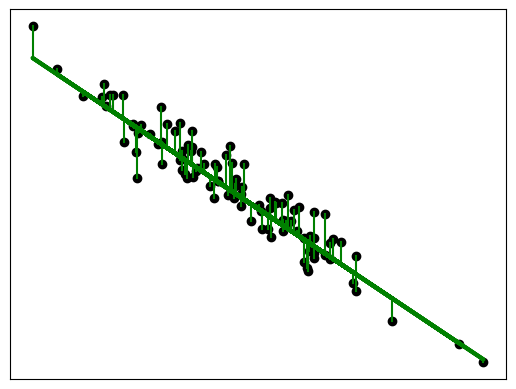

In [5]:
# simple linear regression 一元
from sklearn.linear_model import LinearRegression as lm
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

# 定义样本和特征数量
num_sample=1000
num_feature = 1
# num_feature = 2

# 生成一些样本和特征
ideal_coef = -3
# ideal_coef = [2,-3]
ideal_intercept = 5
feature=np.random.normal(size=(num_sample,num_feature))
label=ideal_coef*feature + ideal_intercept + np.random.normal(size=(num_sample,num_feature))
# label=ideal_coef[0]*feature[:,0] + ideal_coef[1]*feature[:,1] + ideal_intercept + np.random.normal(size=(num_sample,))

# Slice x into training/testing sets
X_train = feature[:-100,:]
X_test = feature[-100:,:]
# Slice y into training/testing sets
y_train = label[:-100]
y_test = label[-100:]

# fit model
model = lm()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print("mean_square_error:%.2f" %mean_squared_error(y_test,y_predict))
print('R-squared: %.2f' %r2_score(y_test, y_predict))
# print('R-squared: %.2f' %model.score(X_test, y_test)) 结果同上
print("coefficient of the model:%.2f" %model.coef_)
print("intercept of the model:%.2f" %model.intercept_)

# Plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_predict, color='green', linewidth=3)

# 残差
for idx, x in enumerate(X_test):
    plt.plot([x, x], [y_test[idx], y_predict[idx]], 'g-')

plt.xticks(())
plt.yticks(())

plt.show()


In [6]:
# simple linear regression  二元
# !!!!! 注意多元线性回归，feature.reshape(1000,)，一定要统一为二维
from sklearn.linear_model import LinearRegression as lm
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# 定义样本和特征数量
num_sample=1000
# num_feature = 1
num_feature = 2

# 生成一些样本和特征
# ideal_coef = -3
ideal_coef = [2,-3]
ideal_intercept = 5
feature=np.random.normal(size=(num_sample,num_feature))
# label=ideal_coef*feature + ideal_intercept + np.random.normal(size=(num_sample,num_feature))
label=ideal_coef[0]*feature[:,0] + ideal_coef[1]*feature[:,1] + ideal_intercept + np.random.normal(size=(num_sample,))

# Slice x into training/testing sets
X_train = feature[:-100,:]
X_test = feature[-100:,:]
# Slice y into training/testing sets
y_train = label[:-100]
y_test = label[-100:]

# fit model
model = lm()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print("mean_square_error:%.2f" %mean_squared_error(y_test,y_predict))
print('R-squared: %.2f' %r2_score(y_test, y_predict))
# print('R-squared: %.2f' %model.score(X_test, y_test)) 结果同上
# print("coefficient of the model:%.2f" %model.coef_)
print("coefficient of the model:%.2f, %.2f" %(model.coef_[0],model.coef_[1]))
print("intercept of the model:%.2f" %model.intercept_)
for i, prediction in enumerate(y_predict):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))



mean_square_error:0.77
R-squared: 0.94
coefficient of the model:1.99, -3.00
intercept of the model:5.01
Predicted: -0.07271438265317443, Target: 0.03922225600370047
Predicted: 6.280852722825036, Target: 6.253870407864132
Predicted: 8.775944063927396, Target: 8.732860121020742
Predicted: 5.326408845919238, Target: 4.395374157970787
Predicted: -1.5358241412574003, Target: -1.6448838612364678
Predicted: 5.275960977034938, Target: 6.001392003019284
Predicted: 8.775733480874235, Target: 10.435200692237634
Predicted: 6.513261761801678, Target: 5.98029163400112
Predicted: 6.050694313711196, Target: 5.8797711056853315
Predicted: -0.2569495184380921, Target: -0.5254824982277202
Predicted: 10.870493631958324, Target: 9.993172708533809
Predicted: 2.731498492313528, Target: 2.2102576941074568
Predicted: 0.09600967465724963, Target: 0.9518875623580783
Predicted: 6.668971244701007, Target: 8.07321599438161
Predicted: 6.063525582840324, Target: 6.120923652956485
Predicted: 4.493698770183209, Target: 

##### Ridge Regression & Lasso Regression
- 语法：
    ```python
    from sklearn.linear_model import Ridge
    from sklearn.linear_model import Lasso
    from sklearn.linear_model import RidgeCV
    from sklearn.linear_model import LassoCV
    ```
- Parameters:  

    **alpha/alphas(CV)**：正则项系数，初始值为1，数值越大，则对复杂模型的惩罚力度越大。 
    **cv**： cross-validation generator，默认留一。  
    **random_state**：种子相同，可以复现。
    **max_iter**：最大迭代次数。  
    **fit_intercept**：有无截距  
    **copy_X**：True赋值，False覆写  
    **normalize**：是否归一化  
    **n_jobs**：default=1，使用CPU数，-1为使用所有CPU  

    更多参数见 [sklearn线性回归参数](https://blog.csdn.net/VariableX/article/details/107166602)

- 调参方法：  

  1. 给定alpha较小的值，例如0.1。
  2. 根据验证集准确率以10倍为单位增大或者减小参数值。[0.001, 0.01, 0.1, 1, 10, 100]
  3. 在找到合适的数量级后，在此数量级上微调。  
    <br>
- Attributes (CV)  
    **alpha_**  
    **best_score_**

In [7]:
# RidgeCV
from sklearn.linear_model import RidgeCV as lm
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# 定义样本和特征数量
num_sample=1000
# num_feature = 1
num_feature = 2

# 生成一些样本和特征
# ideal_coef = -3
ideal_coef = [2,-3]
ideal_intercept = 5
feature=np.random.normal(size=(num_sample,num_feature))
# label=ideal_coef*feature + ideal_intercept + np.random.normal(size=(num_sample,num_feature))
label=ideal_coef[0]*feature[:,0] + ideal_coef[1]*feature[:,1] + ideal_intercept + np.random.normal(size=(num_sample,))

# Slice x into training/testing sets
X_train = feature[:-100,:]
X_test = feature[-100:,:]
# Slice y into training/testing sets
y_train = label[:-100]
y_test = label[-100:]

# fit model
model = lm(alphas = [0.01,0.1,1,10,100])
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print("mean_square_error:%.2f" %mean_squared_error(y_test,y_predict))
print('R-squared: %.2f' %r2_score(y_test, y_predict))
# print('R-squared: %.2f' %model.score(X_test, y_test)) 结果同上
# print("coefficient of the model:%.2f" %model.coef_)
print("coefficient of the model:%.2f, %.2f" %(model.coef_[0],model.coef_[1]))
print("intercept of the model:%.2f" %model.intercept_)
print("best alpha:%.2f" %model.alpha_)
print("best score:%.2f" %model.best_score_)
for i, prediction in enumerate(y_predict):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))

mean_square_error:1.04
R-squared: 0.92
coefficient of the model:2.04, -3.01
intercept of the model:5.01
best alpha:0.10
best score:-1.06
Predicted: 6.172865151236799, Target: 5.221032000671414
Predicted: 3.0948569367324072, Target: 3.0553416566442486
Predicted: 10.119495611142352, Target: 9.35878020901792
Predicted: 6.650222238623546, Target: 7.531043584329374
Predicted: 4.396544569092065, Target: 5.972177034184012
Predicted: 3.904422019614505, Target: 4.26300079519759
Predicted: 6.108400415625479, Target: 6.26761967522712
Predicted: 9.98326118553673, Target: 8.871682061968292
Predicted: 3.7561999405194992, Target: 1.136879301682896
Predicted: -0.17605344571861714, Target: -0.5889758863189452
Predicted: -0.20929468309352295, Target: 0.6078249192895236
Predicted: 0.593354401071843, Target: 0.7696330467050877
Predicted: 10.365149646405165, Target: 11.046063758161269
Predicted: 3.2208820469149377, Target: 2.8507592834207345
Predicted: 6.28428243973401, Target: 6.495823133728423
Predicted:

##### Elastic Net 弹性网
##### Perceptron 感知机

#### 非线性

- 线性模型解决非线性问题
  - 分箱
  - 多项式回归
- Decision tree
- Random forest
- SVM

##### 线性模型-分箱

- 语法：
    ```python
    from sklearn.preprocessing import KBinsDiscretizer
    ```
- Parameters:  

    **n_bins**：几个箱子  
    **strategy**：{‘uniform’, ‘quantile’, ‘kmeans’}，default=’quantile’，宽度一样，点数一样，kmeans聚类
    **random_state**：种子相同，可以复现。  

- Attributes:  

    **bin_edges_**：边界array  
    **n_bins_**：个数int array  
    **n_features_in_**  
    **feature_names_in_**  

- Methods:

    **fit(X)**  
    **transform(X)**  
    **inverse_transform(Xt)**  
    **fit_transform(X, y)**  
    **get_params(X, y, sample_weight)**: 获取参数  
    **set_params(para)**: 设置参数    

##### 线性模型-多项式拟合

- 语法：
    ```python
    from sklearn.preprocessing import PolynomialFeatures
    quadratic_featurizer = PolynomialFeatures(degree=2)
    X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
    X_test_quadratic = quadratic_featurizer.fit_transform(X_test)
    ```
- Parameters:  

    **degree**：几次  
    **random_state**：种子相同，可以复现。  

- Attributes:  

    **powers_**：各个项分别是几次  
    **n_output_features_**：多项式升维后有几个feature  
    **n_features_in_**：升维前有几个feature  
    **feature_names_in_**：升维前feature名字  

- Methods:

    **fit(X)**  
    **fit_transform(X,y)**
    **get_params(X, y, sample_weight)**: 获取参数  
    **set_params(para)**: 设置参数 

##### Decision Tree
[决策树详讲](https://ml.bbbdata.com/site/text/32)
- 优点
  - 不用标准化，归一化
  - 可以同时处理连续变量和离散变量。其他的工具常常只能分析一种变量。
  - 运算速度快。训练决策树的成本和数据点的数量为对数关系。
  - 利于理解和解释，便于可视化。
  - 统计检验可检验模型可靠性。  

- 缺点
  - 容易过拟合
  - 不稳定
  - 局部最优
  - 每个类别的样本量要平衡（样本数大于特征数）  

- 三种算法对比
  - 适用范围  
    ID3算法只能处理离散特征的分类问题，C4.5能够处理离散特征和连续特征的分类问题，CART算法可以处理离散和连续特征的分类与回归问题。  
  - 假设空间：  
    ID3和C4.5算法使用的决策树可以是多分叉的，而CART算法的决策树必须是二叉树。
  - 优化算法：  
    ID3算法没有剪枝策略，当叶子节点上的样本都属于同一个类别或者所有特征都使用过了的情况下决策树停止生长。  
    C4.5算法使用预剪枝策略，当分裂后的增益小于给定阈值或者叶子上的样本数量小于某个阈值或者叶子节点数量达到限定值或者树的深度达到限定值，决策树停止生长。  
    CART决策树主要使用后剪枝策略。  
- 语法
  ```python
  from sklearn.tree import DecisionTreeRegressor
  ```
- Parameters（主要看前2/3，最多看前5）  
  
  **max_leaf_nodes**： 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制具体的值可以通过交叉验证得到。  

  **max_depth**：int or None, optional (default=None) 一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。常用来解决过拟合。  

  **ccp_alpha**：剪枝时的alpha系数，需要剪枝时设置该参数，默认值是不会剪枝的。  

  **min_samples_split**：如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分，如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。  

  **min_samples_leaf**： 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝，如果样本量不大，不需要管这个值，大些如10W可以尝试下5  

  **random_state**：种子相同，可以复现。  
  
  **criterion**：（回归树）mse:默认，均方差，mae：平均绝对差，friedman_mse。（分类树）gini或者entropy,前者是基尼系数，后者是信息熵。两种算法差异不大对准确率无影响，信息熵运算效率低一点，因为它有对数运算.一般说使用默认的基尼系数”gini”就可以了，即CART算法。除非你更喜欢类似ID3, C4.5的最优特征选择方法。  

  **splitter**：best or random 前者是在所有特征中找最好的切分点，后者是在部分特征中。默认的”best”适合样本量不大的时候，而如果样本数据量非常大，推荐”random” 。  

  **max_features**：None（所有），log2，sqrt，N  特征小于50的时候一般使用所有的。  

  **min_weight_fraction_leaf**： 这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。    

  **class_weight**： 指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。（分类树有，回归树无）  

  **min_impurity_split**： 这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值则该节点不再生成子节点。即为叶子节点 。

### Classification -- discrete

In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X1 = np.arange(1, 9).reshape(-1, 2)
X2 = np.arange(10, 14).reshape(-1, 2)
y = np.arange(2, 4).reshape(-1, 1)
X1
X2
# y

array([[10, 11],
       [12, 13]])

In [2]:
poly = PolynomialFeatures(degree=2)

In [3]:
X_binned = poly.fit_transform(X1)
X_binned

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  5.,  6., 25., 30., 36.],
       [ 1.,  7.,  8., 49., 56., 64.]])

In [4]:
line_binned = poly.transform(X2)
line_binned

array([[  1.,  10.,  11., 100., 110., 121.],
       [  1.,  12.,  13., 144., 156., 169.]])

In [6]:
poly.powers_

array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2]])